# Código de um SVM

Este é o código e o conjunto de anotações de estudo sobre SVM

Links interessantes:
* http://tullo.ch/articles/svm-py/
* http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
* https://github.com/ajtulloch/svmpy/blob/master/svmpy/svm.py
* https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb
* https://sadanand-singh.github.io/posts/svmpython/

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
# Estes são nossos pontos de teste
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1]
])

# Estas são as classes 
y = np.array([-1, -1, 1, 1, 1])

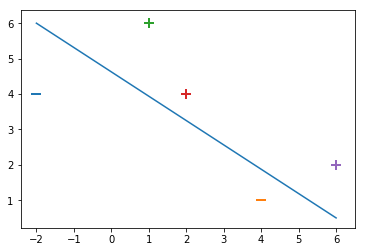

In [43]:
for d, sample in enumerate(X):
    marker = '+'
    if y[d] == -1:
        marker = '_'
    plt.scatter(sample[0], sample[1], s=120, marker=marker, lw=2)

# Vamos Tentar um hiper-plano que separe os pontos
plt.plot([-2,6], [6, 0.5])

In [47]:
# Otimizando uma função que é combinação de um regularizador + Hinge Loss Function 

# parâmatros
eta = 1 # learning rate
epochs = 1000


def svm_sgd_plot(X, Y):
    # inicializa os pesos do svg com 0
    w = np.zeros(len(X[0]))

    # armazenando os dados classificados de forma errada para plotarmos depois!
    errors = []
    for epoch in range (1, epochs):
        error = 0
        for i, x in enumerate(X):
            # se está classificado errado
            if (Y[i]*np.dot(X[1], w)) < 1:
                w = w + eta * ((X[i] * Y[i]) * (-2 * 1/epoch) * w)
                error = 1
            else:
                w = w + eta * (-2 * 1/epoch) * w  
        errors.append(error)

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

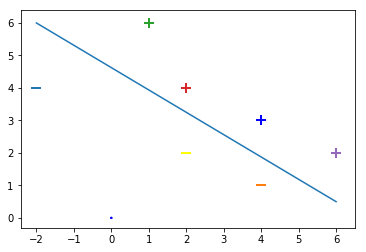

In [48]:
for d, sample in enumerate(X):
    marker = '+'
    if y[d] == -1:
        marker = '_'
    plt.scatter(sample[0], sample[1], s=120, marker=marker, lw=2)

#Samples de test
plt.scatter(2, 2, s=120, marker='_', lw=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', lw=2, color='blue')

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
XX, YY, UU, VV = zip(*x2x3)
ax = plt.gca()

ax.quiver(XX, YY, UU, VV, scale=1, color='blue')

# Vamos Tentar um hiper-plano que separe os pontos
plt.plot([-2,6], [6, 0.5])

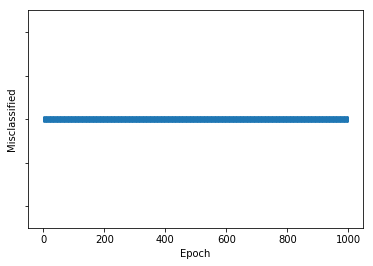

In [49]:
w = svm_sgd_plot(X,y)